In [ ]:
pip install --upgrade scikit-learn

In [ ]:
#importing drive to colab in order to access our dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import cv2
import tensorflow as tf
from tqdm import tqdm
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

# Ignore Warnings
import warnings
import time
warnings.filterwarnings("ignore")

In [ ]:
Tumor_types = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [ ]:
#loading our training data into X_train array
import cv2
import numpy as np
import tensorflow as tf
from tqdm import tqdm
import os
X_train = []
y_train = []
image_size = 150
for i in Tumor_types:
    folder_path = os.path.join('/content/gdrive/My Drive/bt/Training-1/Training',i)
    for j in tqdm(os.listdir(folder_path)):
        img = cv2.imread(os.path.join(folder_path,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 1757/1757 [00:30<00:00, 58.31it/s] 


In [ ]:
X_train[7022]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [3, 3, 3],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       ...,

       [[1, 1, 1],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

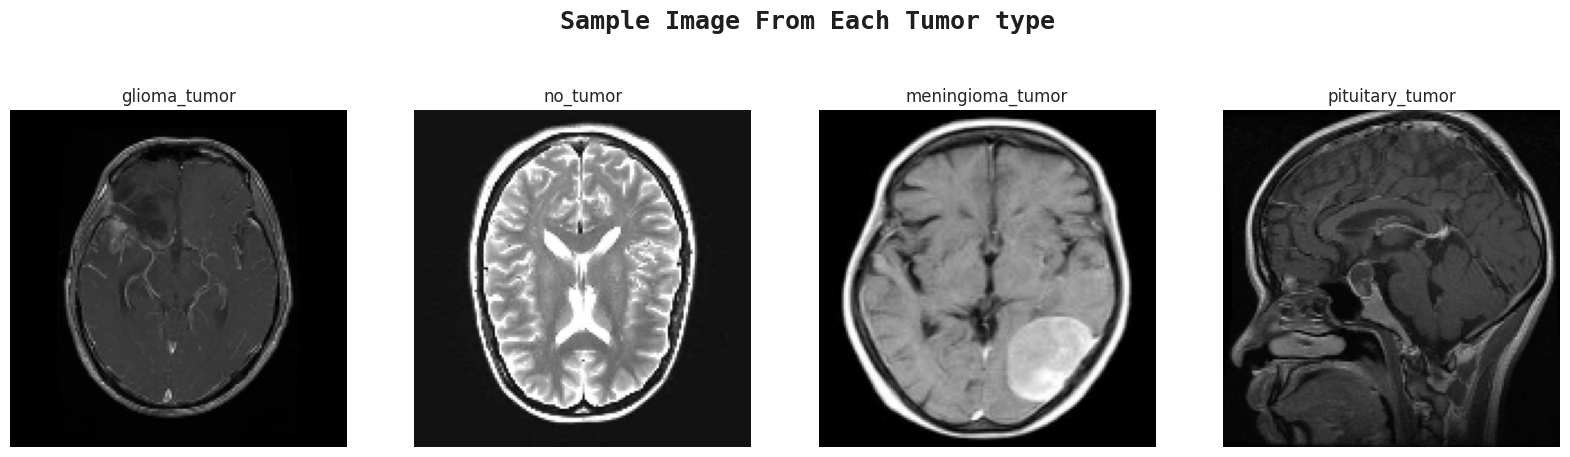

In [ ]:
import matplotlib.pyplot as plt
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Tumor type',size=18,fontweight='bold',
             fontname='monospace',color="#1F1F1F",y=0.62,x=0.4,alpha=1)
for i in Tumor_types:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [ ]:
#image Preprocessing using ImageDataGenerator
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
datagen.fit(X_train)

In [ ]:
X_train[7022]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
#Onehot Decoding for splitting of training dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.3,random_state=101)

In [ ]:
#Performing Onehot Encoding
y_train_new = []
for i in y_train:
    y_train_new.append(Tumor_types.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)
y_test_new = []
for i in y_test:
    y_test_new.append(Tumor_types.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# Convert images to grayscale
X_train_gray = np.dot(X_train[..., :3], [0.2989, 0.5870, 0.1140])
X_test_gray = np.dot(X_test[..., :3], [0.2989, 0.5870, 0.1140])

In [ ]:
# Reshape the input data for LSTM model
X_train_reshaped = X_train_gray.reshape(X_train_gray.shape[0], -1, 1)
X_test_reshaped = X_test_gray.reshape(X_test_gray.shape[0], -1, 1)

In [ ]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Use 4 units for the 4 tumor types
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               1

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the LSTM model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_data=(X_test_reshaped, y_test))

Epoch 1/100
77/77 [==============================] - 73s 828ms/step - loss: 1.2765 - accuracy: 0.3535 - val_loss: 1.2026 - val_accuracy: 0.4964
Epoch 2/100
77/77 [==============================] - 63s 815ms/step - loss: 1.2022 - accuracy: 0.4742 - val_loss: 1.1218 - val_accuracy: 0.5325
Epoch 3/100
77/77 [==============================] - 64s 835ms/step - loss: 1.1435 - accuracy: 0.4967 - val_loss: 1.0729 - val_accuracy: 0.5486
Epoch 4/100
77/77 [==============================] - 64s 836ms/step - loss: 1.1063 - accuracy: 0.5077 - val_loss: 1.0307 - val_accuracy: 0.5477
Epoch 5/100
77/77 [==============================] - 65s 847ms/step - loss: 1.1048 - accuracy: 0.5075 - val_loss: 1.0321 - val_accuracy: 0.5449
Epoch 6/100
77/77 [==============================] - 65s 848ms/step - loss: 1.0786 - accuracy: 0.5100 - val_loss: 0.9818 - val_accuracy: 0.5619
Epoch 7/100
77/77 [==============================] - 65s 846ms/step - loss: 1.0656 - accuracy: 0.5157 - val_loss: 1.0201 - val_accuracy:

In [ ]:
# Predict the labels for the train data
y_train_pred_labels = model.predict(X_train_reshaped)

154/154 [==============================] - 38s 243ms/step


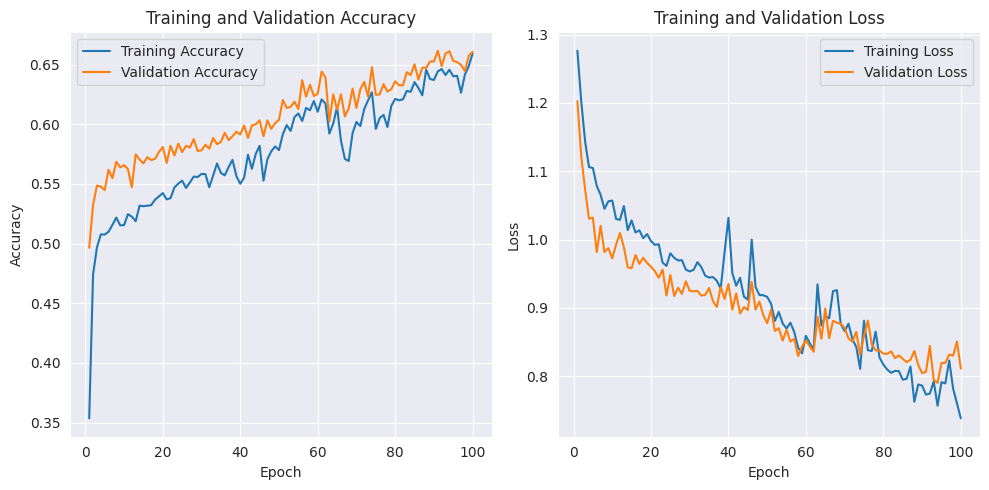

In [ ]:
import matplotlib.pyplot as plt

# Extract the training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
score = model.evaluate(X_test_reshaped, y_test)

66/66 [==============================] - 27s 401ms/step - loss: 0.8113 - accuracy: 0.6607


In [26]:
# Predict the labels for the test data
y_test_pred_labels = model.predict(X_test_reshaped)

66/66 [==============================] - 17s 250ms/step


In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Convert one-hot encoded labels back to their original class labels
y_train_true = [Tumor_types[np.argmax(label)] for label in y_train]
y_test_true = [Tumor_types[np.argmax(label)] for label in y_test]

# Convert model predictions to class labels
y_train_pred = [Tumor_types[np.argmax(label)] for label in y_train_pred_labels]
y_test_pred = [Tumor_types[np.argmax(label)] for label in y_test_pred_labels]

# Calculate accuracy
train_accuracy = accuracy_score(y_train_true, y_train_pred)
test_accuracy = accuracy_score(y_test_true, y_test_pred)

# Calculate recall, precision, and F1-score
train_recall = recall_score(y_train_true, y_train_pred, average='weighted')
test_recall = recall_score(y_test_true, y_test_pred, average='weighted')

train_precision = precision_score(y_train_true, y_train_pred, average='weighted')
test_precision = precision_score(y_test_true, y_test_pred, average='weighted')

train_f1 = f1_score(y_train_true, y_train_pred, average='weighted')
test_f1 = f1_score(y_test_true, y_test_pred, average='weighted')

print("\nTraining LSTM Model:")
print("Training Accuracy:{:.4f}".format(train_accuracy))
print("Training Recall:{:.4f}".format(train_recall))
print("Training Precision:{:.4f}".format(train_precision))
print("Training F1 Score:{:.4f}".format(train_f1))

print("\nTesting LSTM Model:")
print("Testing Accuracy:{:.4f}".format(test_accuracy))
print("Testing Recall:{:.4f}".format(test_recall))
print("Testing Precision{:.4f}".format(test_precision))
print("Testing F1 Score:{:.4f}".format(test_f1))


Training LSTM Model:
Training Accuracy:0.6672
Training Recall:0.6672
Training Precision:0.7808
Training F1 Score:0.6699

Testing LSTM Model:
Testing Accuracy:0.6607
Testing Recall:0.6607
Testing Precision0.7345
Testing F1 Score:0.6599


####ADA BOOST

In [29]:
# Reshape the input data for AdaBoostClassifier
X_train_reshaped = X_train_gray.reshape(X_train_gray.shape[0], -1)
X_test_reshaped = X_test_gray.reshape(X_test_gray.shape[0], -1)

In [30]:
# Convert the one-hot encoded labels to 1D array
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

In [32]:
# Create an AdaBoostClassifier with DecisionTreeClassifier as the base estimator
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)


In [33]:
# Fit the AdaBoostClassifier to the training data
ada_boost.fit(X_train_reshaped, y_train_labels)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [34]:
# Predict the labels for the train data
y_train_pred_ada = ada_boost.predict(X_train_reshaped)

In [35]:
# Predict the labels for the test data
y_test_pred_ada = ada_boost.predict(X_test_reshaped)

In [36]:
from sklearn.metrics import roc_auc_score
# AdaBoost Model Metrics
y_train_pred_ada = ada_boost.predict(X_train_reshaped)
y_test_pred_ada = ada_boost.predict(X_test_reshaped)

Training_ada_accuracy = accuracy_score(y_train_labels, y_train_pred_ada)
Trainig_ada_f1 = f1_score(y_train_labels, y_train_pred_ada, average='macro')
Training_ada_precision = precision_score(y_train_labels, y_train_pred_ada, average='macro')
Training_ada_recall = recall_score(y_train_labels, y_train_pred_ada, average='macro')

Test_ada_accuracy = accuracy_score(y_test_labels, y_test_pred_ada)
Test_ada_f1 = f1_score(y_test_labels, y_test_pred_ada, average='macro')
Test_ada_precision = precision_score(y_test_labels, y_test_pred_ada, average='macro')
Test_ada_recall = recall_score(y_test_labels, y_test_pred_ada, average='macro')


print("\nTraining AdaBoost Model:")
print("Training Accuracy Score: {:.4f}".format(Training_ada_accuracy))
print("Training F1 Score: {:.4f}".format(Trainig_ada_f1))
print("Training Precision Score: {:.4f}".format(Training_ada_precision))
print("Training Recall Score: {:.4f}".format(Training_ada_recall))

print("\nTest AdaBoost Model:")
print("Test Accuracy Score: {:.4f}".format(Test_ada_accuracy))
print("Test F1 Score: {:.4f}".format(Test_ada_f1))
print("Test Precision Score: {:.4f}".format(Test_ada_precision))
print("Test Recall Score: {:.4f}".format(Test_ada_recall))


Training AdaBoost Model:
Training Accuracy Score: 1.0000
Training F1 Score: 1.0000
Training Precision Score: 1.0000
Training Recall Score: 1.0000

Test AdaBoost Model:
Test Accuracy Score: 0.8519
Test F1 Score: 0.8463
Test Precision Score: 0.8466
Test Recall Score: 0.8465


In [37]:
print(model)
print(ada_boost)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)


In [38]:
# Save the LSTM model
model.save('lstm_model.h5')

In [39]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('lstm_model.h5')

In [40]:
pip install joblib

In [41]:
import joblib

# Save the AdaBoost classifier
joblib.dump(ada_boost, 'ada_boost_classifier.pkl')

['ada_boost_classifier.pkl']

In [42]:
# Load the saved AdaBoost classifier
ada_boost = joblib.load('ada_boost_classifier.pkl')


In [ ]:
  image_path = "/content/gdrive/My Drive/bt/no.jpg"

In [43]:
import io
from tensorflow.keras.models import load_model
from ipywidgets import widgets, Layout
from IPython.display import display
from PIL import Image

# Load the LSTM model
lstm_model = load_model('lstm_model.h5')

# Load and preprocess the input image
def preprocess_image(uploader):
    image_size = 150
    uploaded_file = uploader.value[list(uploader.value.keys())[0]]
    content = uploaded_file['content']
    image = Image.open(io.BytesIO(content))
    img = np.array(image)
    img = cv2.resize(img, (image_size, image_size))
    img_gray = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
    img_reshaped = img_gray.reshape(1, -1, 1)
    return img_reshaped

# Define the tumor types
tumor_types = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']

# Predict the tumor type using the LSTM model
def predict_tumor_type_lstm(uploader):
    try:
        preprocessed_img = preprocess_image(uploader)
        lstm_prediction = lstm_model.predict(preprocessed_img)
        predicted_label_index = np.argmax(lstm_prediction)
        predicted_tumor_type = tumor_types[predicted_label_index]
        return predicted_tumor_type
    except Exception as e:
        print("Error occurred while predicting with LSTM model:", e)
        return None

def on_button_clicked(b):
    with output:
        predicted_tumor_type_lstm = predict_tumor_type_lstm(uploader_widget)
        print("Predicted tumor type using LSTM model:", predicted_tumor_type_lstm)

if __name__ == "__main__":
    uploader_widget = widgets.FileUpload(
        accept='.jpg',  # Adjust accepted file types as needed
        layout=Layout(width='50%')
    )
    display(uploader_widget)

    button = widgets.Button(description='Predict', layout=Layout(width='50%'))
    output = widgets.Output(layout=Layout(width='50%'))

    button.on_click(on_button_clicked)
    display(button, output)


FileUpload(value={}, accept='.jpg', description='Upload', layout=Layout(width='50%'))

Button(description='Predict', layout=Layout(width='50%'), style=ButtonStyle())

Output(layout=Layout(width='50%'))

In [45]:
import io
import ipywidgets as widgets
from PIL import Image
from IPython.display import display, clear_output
from warnings import filterwarnings

# Load the ada_boost_classifier
ada_boost_classifier = joblib.load('ada_boost_classifier.pkl')

# Set the desired image size
image_size = 150

# Define the tumor types
tumor_types = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']

# Function to preprocess the image
def preprocess_image(uploader):
    content = uploader.value[list(uploader.value.keys())[0]]['content']
    img = Image.open(io.BytesIO(content))
    img = np.array(img)
    img = cv2.resize(img, (image_size, image_size))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_reshaped = img_gray.flatten().reshape(1, -1)  # Flatten the array
    return img_reshaped

# Predict the tumor type using the ada_boost_classifier
def predict_tumor_type_ada_boost_classifier(uploader):
    try:
        img_pred = preprocess_image(uploader)
        ada_boost_classifier_prediction = ada_boost_classifier.predict(img_pred)
        predicted_label_index = ada_boost_classifier_prediction[0]
        predicted_tumor_type = tumor_types[predicted_label_index]
        return predicted_tumor_type
    except Exception as e:
        print("Error occurred while predicting with ada_boost_classifier:", e)
        return None

if __name__ == "__main__":
    uploader_widget = widgets.FileUpload()
    display(uploader_widget)
    button = widgets.Button(description='Predict')
    output = widgets.Output()

    def on_button_clicked(b):
        with output:
            clear_output()
            predicted_tumor_type_ada_boost_classifier = predict_tumor_type_ada_boost_classifier(uploader_widget)
            print("Predicted tumor type using ada_boost_classifier:", predicted_tumor_type_ada_boost_classifier)

    button.on_click(on_button_clicked)
    display(button, output)


FileUpload(value={}, description='Upload')

Button(description='Predict', style=ButtonStyle())

Output()